# Data Challenge 12 — Intro to Logistic Regression

**Hook (Attention Grabber)**  
> “If an app told a restaurant it has an 80% chance of getting an **A** on inspection, would you trust it?”

**Learning Goals**
- Show why **linear regression** is a bad fit for a **binary (0/1)** target.
- Fit a **one-feature logistic regression** and interpret probabilities.
- Extend to a **two-feature logistic model with standardized inputs**.
- Communicate results using **AWES** and discuss **ethics & people impact**.

**Data:** June 1, 2025 - Nov 4, 2025 Restaurant Health Inspection

[Restaurant Health Inspection](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data)


## Instructor Guidance

**Hint: Use the Lecture Deck, Canvas Reading, and Docs to help you with the code**

Use this guide live; students implement below.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- LinearRegression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- LogisticRegression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- StandardScaler — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- accuracy_score — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- corr — pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

### Pseudocode Plan (Linear vs Logistic + Scaling)
1) **Load CSV** → preview shape/columns; keep needed fields.  
2) **Engineer binary Y**: `is_A = 1 if grade == 'A' else 0`.  
3) **Pick numeric X**:  
   - **X1:** `score` (inspection score; lower is better)  
   - **X2:** `critical_num = 1 if critical_flag == 'Critical' else 0` (for extension)  
4) **Split** → `X_train, X_test, y_train, y_test` (70/30, stratify by Y, fixed random_state).  
5) **Model A (Incorrect)** → **LinearRegression** on Y~X1:  
   - Report **MSE**, **R²**, count predictions **<0 or >1**,  
6) **Model B (Correct)** → **LogisticRegression** on Y~X1:  
   - Report **Accuracy**
7) **Visual (OPTIONAL)** → scatter Y vs X1 with **linear line** vs **logistic sigmoid** curve  
8) **Extension** → scale X1+X2 with **StandardScaler**; fit **LogisticRegression**:  
   - Compare **Accuracy** to one-feature logistic  
9) **Interpret** → 2–3 sentences on why linear fails and how logistic fixes it  


## You Do — Student Section
Work in pairs. Comment your choices briefly. Keep code simple—only coerce the columns you use.

## Step 1 — Imports and Plot Defaults

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


### Step 2 — Load CSV & Preview
- Point to your New York City Restaurant Inspection Data 

In [141]:
df = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Lab/DA2025_Lectures/Mod6/data/restaurant_inspection_cleaned.csv')

In [142]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,...,INSPECTION_TYPE,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,NTA,Location
0,50141498,DMM BAKERY,Brooklyn,6802,BAY PARKWAY,11204.0,7183314372,Chinese,2025-06-16,No violations were recorded at the time of thi...,...,Cycle Inspection / Initial Inspection,40.612100,-73.983252,311.0,47.0,25800.0,3135132.0,3.055800e+09,BK28,POINT (-73.983252132334 40.612100428335)
1,50115119,JANNAT ADEN RESTAURANT,Bronx,2620,AVENUE Z,NaN,7185004894,Middle Eastern,2025-07-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
2,50121689,BELLA ITALY PIZZA,Bronx,1941,SOUTHERN BOULEVARD,10460.0,7183789577,Pizza,2025-06-09,No violations were recorded at the time of thi...,...,Administrative Miscellaneous / Initial Inspection,40.842262,-73.885759,206.0,15.0,36502.0,2010160.0,2.029600e+09,BX17,POINT (-73.885758684936 40.842261957703)
3,50142981,PIZZA PLUS,Manhattan,2253,3 AVENUE,10035.0,2122892400,Pizza,2025-06-09,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.802072,-73.936988,111.0,8.0,19400.0,1054626.0,1.017870e+09,MN34,POINT (-73.936988471232 40.802071782442)
4,50139126,WONDER,Brooklyn,310,SCHERMERHORN STREET,11217.0,9142614549,Fusion,2025-06-07,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.687480,-73.982245,302.0,33.0,4100.0,3000556.0,3.001728e+09,BK38,POINT (-73.982245142975 40.687480172953)


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41100 entries, 0 to 41099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  41100 non-null  int64  
 1   DBA                    41100 non-null  object 
 2   BORO                   41100 non-null  object 
 3   BUILDING               40940 non-null  object 
 4   STREET                 41100 non-null  object 
 5   ZIPCODE                40597 non-null  float64
 6   PHONE                  41100 non-null  object 
 7   CUISINE_DESCRIPTION    41100 non-null  object 
 8   INSPECTION_DATE        41100 non-null  object 
 9   ACTION                 41100 non-null  object 
 10  VIOLATION_CODE         40591 non-null  object 
 11  VIOLATION_DESCRIPTION  40591 non-null  object 
 12  CRITICAL_FLAG          41100 non-null  object 
 13  SCORE                  39329 non-null  float64
 14  GRADE                  22556 non-null  object 
 15  GR

In [144]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [145]:
[df['GRADE'].notna().sum(), df['GRADE'].isna().sum()]

[np.int64(22556), np.int64(18544)]

In [146]:
df = df[(df['INSPECTION_DATE'] >= '2025-06-01') & (df['INSPECTION_DATE'] < '2025-11-04')]

In [147]:
df.shape

(41100, 27)

In [148]:
df.isna().sum()

CAMIS                        0
DBA                          0
BORO                         0
BUILDING                   160
STREET                       0
ZIPCODE                    503
PHONE                        0
CUISINE_DESCRIPTION          0
INSPECTION_DATE              0
ACTION                       0
VIOLATION_CODE             509
VIOLATION_DESCRIPTION      509
CRITICAL_FLAG                0
SCORE                     1771
GRADE                    18544
GRADE_DATE               21430
RECORD_DATE                  0
INSPECTION_TYPE              0
Latitude                   107
Longitude                  107
Community_Board            677
Council_District           677
Census_Tract               677
BIN                        887
BBL                        219
NTA                        677
Location                   565
dtype: int64

In [149]:
# Coerce fare, tip, distance to numeric safely
num_cols = ['GRADE', 'SCORE']
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols)

In [150]:
df.shape

(22554, 27)

In [151]:
df['SCORE'].unique()

array([  0.,  28.,  55.,  12.,  21.,  11.,  24.,  10.,  18.,  25.,   8.,
        20.,  36.,  13.,  59.,  44.,  34.,  27.,  64.,   6.,   5.,   7.,
        43.,  23.,  48.,  22.,  31.,  42.,   4.,  37.,  56.,  50.,  15.,
        17.,  14.,  40.,   2.,  26.,  67.,   9.,  53.,  41.,  33.,  35.,
       101.,  68.,  54.,  49.,  30.,  46.,  57.,  16.,  29.,  74.,  32.,
        52.,  47.,  45.,  83.,  51.,  38.,  78.,  63.,  62.,   3.,  39.,
        19., 180.,  65.,  77.,  71.,  98.,  60.,  61.,  84.,  69.,  58.,
        73., 125.,  89., 203.,  94., 122.,  81.,  66.,  96.,  76.,  92.,
        93.,  72.,  70., 102.,  88.,  86.,  79.,  82., 144.,  80.])

## Step 3 — Clean and Engineer Features
- Make sure `SCORE` is numeric and do any other data type clean-up 
- Engineer binary target variable (Y) based on instructor guidance above `is_A`
- Engineer binary predictor (X) based on instructor guidance above `critical_num`


In [152]:
df['SCORE'].info()

<class 'pandas.core.series.Series'>
Index: 22554 entries, 0 to 41099
Series name: SCORE
Non-Null Count  Dtype  
--------------  -----  
22554 non-null  float64
dtypes: float64(1)
memory usage: 352.4 KB


In [153]:
df['is_A'] = (df['GRADE'] == 'A').astype(int)

In [154]:
df['is_A'].value_counts()

is_A
1    11905
0    10649
Name: count, dtype: int64

In [155]:
df['CritiCal_num'] = (df['CRITICAL_FLAG'] == 'Critical').astype(int)

In [156]:
df['CritiCal_num'].value_counts()

CritiCal_num
1    11679
0    10875
Name: count, dtype: int64

## Step 4 — Split Data (70/30 Stratify by Target)

In [158]:
X_A = df[['SCORE']]
y_A = df['is_A']
X_A = sm.add_constant(X_A)
# Split the data into training and testing sets
X_train_A, X_test_A, y_train_A, y_test_A  = train_test_split(X_A, y_A, test_size=0.3, stratify=y_A, random_state=42)

## Step 5 — Model A: Linear Regression on a Binary Target (Incorrect)

- Fit `is_A (Y var) ~ SCORE (X pred)` using **LinearRegression**  
- Report **MSE**, **R²**, and how many predictions fall outside [0, 1]  
- Estimate accuracy by thresholding predictions at 0.5 (done for you but understand the code) 

💡 Hint:  
`accuracy_score(y_test, (y_pred >= 0.5).astype(int))`

In [159]:
# Fit the OLS regression model
model_A = sm.OLS(y_train_A, X_train_A).fit()
# Print the model summary
print(model_A.summary())

                            OLS Regression Results                            
Dep. Variable:                   is_A   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 1.402e+04
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:48:28   Log-Likelihood:                -6417.5
No. Observations:               15787   AIC:                         1.284e+04
Df Residuals:                   15785   BIC:                         1.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9593      0.005    206.189      0.0

In [160]:
# Predictions

y_pred_A = model_A.predict(X_test_A)

# Evaluate
print("R²:", r2_score(y_test_A, y_pred_A))
print("RMSE:", mean_squared_error(y_test_A, y_pred_A))

R²: 0.4485822541539173
RMSE: 0.13742656719296678


No predictions fall outside the 0-1 range, so no need to adjust for that.

In [161]:
accuracy_score(y_test_A, (y_pred_A >= 0.5).astype(int))

0.8876902615634698

## Step 6 — Model B: Logistic Regression (One Feature)

- Fit `is_A ~ score` using **LogisticRegression**  
- Compute predictions with `.predict()`  
- Evaluate accuracy with `accuracy_score()`

In [162]:
# Initialize and fit the model
model_B = LogisticRegression()
model_B.fit(X_train_A, y_train_A)

# Make predictions on the test set
y_pred_B = model_B.predict(X_test_A)
# Print a simple accuracy score (we will learn better metrics later)
print(f"Model Accuracy: {accuracy_score(y_test_A, y_pred_B):.2f}")

Model Accuracy: 0.97


## Step 7 (OPTIONAL) — Visual Comparison: Linear vs Logistic


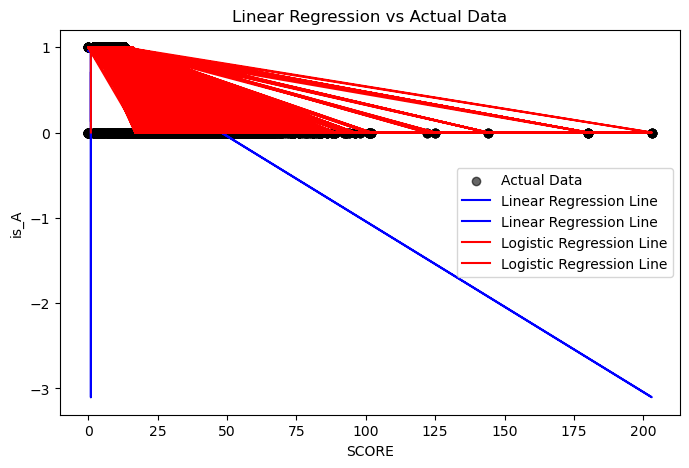

In [166]:
# Step 4: Plot comparison
plt.figure(figsize=(8,5))
plt.scatter('SCORE', 'is_A', color='black', alpha=0.6, label='Actual Data', data=df)
plt.plot(X_test_A, y_pred_A, color='blue', label='Linear Regression Line')
plt.plot(X_test_A, y_pred_B, color='red', label='Logistic Regression Line')
plt.xlabel('SCORE')
plt.ylabel('is_A')
plt.title('Linear Regression vs Actual Data')
plt.legend()
plt.show()

## Step 8 — Logistic Regression with Two **Scaled** Features

- Use `SCORE` and `critical_num` as your two X predictors that need to be scaled
- Look at documentation above to see how you would fit a StandardScalar() object 


In [122]:
from sklearn.preprocessing import StandardScaler
X_c = df[['SCORE', 'CritiCal_num']]
y = df['is_A']
X_c = sm.add_constant(X_c)
scaler = StandardScaler()
scaler.fit(X_c)
# Split the data into training and testing sets
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y, test_size=0.3, stratify=y, random_state=42)


In [125]:
# Initialize and fit the model
model_C = LogisticRegression()
model_C.fit(X_c_train, y_c_train)

# Make predictions on the test set
y_c_pred = model_C.predict(X_c_test)
# Print a simple accuracy score (we will learn better metrics later)
print(f"Model Accuracy: {accuracy_score(y_c_test, (y_c_pred >= 0.5).astype(int)):.2f}")

Model Accuracy: 0.97


# We Share — Reflection & Wrap-Up

Write **two short paragraphs** (4–6 sentences each). Be specific and use evidence from your notebook.

1️⃣ **How do you know Linear Regression was a poor model choice for this task?**  
Describe what you observed in your results or plots that showed it didn’t work well for a binary outcome.  
Consider: Were predictions outside 0–1? Did the fit look wrong? What happened when you used 0.5 as a cutoff?  
Connect this to the idea that classification models should output probabilities between 0 and 1.

- A linear regression is a poor model for the predictions we want to make because, the response variable we are trying to predict is categorical, and linear regressiion is best used to predict numerical values. In this case, the model is using logistic regression to predict the probability of a having the grade "A" (the highest score) based the score value. So, this is a problem because, if we use a linear regression here. The fit didn't look wrong, but the model can give us an impossible probability like values dehind the intervalle of [0,1], which doesn’t make sense. When I used the .5 cutoff, the model accuracy improved by 10.

2️⃣ **When should we scale features in logistic regression (and when not to)?**  
Explain what scaling does, and why it might (or might not) matter for different kinds of features.  
Use this project to reason through whether `score` and `critical_num` needed scaling.  
Hint: Think about what “continuous” vs “binary” means for scaling decisions.

- Feature scalling is basically tranforming to variable in the same format or unit, this is very important when building a model using logistic regression because if the scalars (values) are non in the same length, the model might unfairly treat one feature better than the oter just because it has larger numeric values. Scaling ensures all features are treated equally to best predict to outcome variable. In this case `Score` is a continous variable, it can go up and increase a lot sometimes, but the `Critical_num` is just a flag representing the categorical (yes=1 or n=0), so the model can treat infairly `Critical_num` that is equal to 1 compare `Score` equal to 35.
    - we should not scale if we’re using variable already on the same scale. 